In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
import matplotlib.pyplot as plt


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

4423680/4422102 [==============================] - 0s 0us/step
0
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]

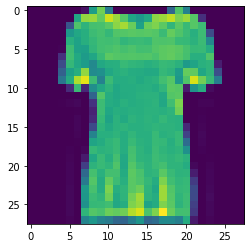

In [2]:
#Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
plt.imshow(train_images[10])
print(train_labels[10])
print(train_images[10])

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

---



In [3]:
# Normalization 
train_images=train_images.reshape(60000, 28, 28, 1)
train_images=train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0




Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
The size of the Convolution, in this case a 3x3 grid
The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
In the first layer, the shape of the input data.
You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1639424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

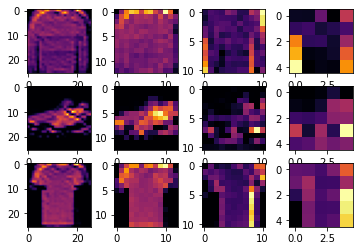

In [5]:
#visualizing the convolution and pooling

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=20
SECOND_IMAGE=70
THIRD_IMAGE=260
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Let's now design the model. 

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #if(logs.get('accuracy')>0.6):
    if(logs.get('loss')<0.2): 
      print("\n loss is low so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [7]:
#compile and fit 

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.4069 - accuracy: 0.8508
Epoch 2/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2726 - accuracy: 0.8985
Epoch 3/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.2236 - accuracy: 0.9161
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1885 - accuracy: 0.9287
 loss is low so cancelling training!
1875/1875 [==============================] - 106s 56ms/step - loss: 0.1885 - accuracy: 0.9287


In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.2638 - accuracy: 0.9072


[0.2638237476348877, 0.9071999788284302]

In [9]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
